# Interpolación
#### https://meet.noysi.com/metodosnumericos1

En esta práctica vamos a aplicar los distintos métodos de interpolación y de aproximación vistos en clase a la función
$$f(x) = \frac{1}{1+x^2},\quad x\in[-3,3]$$
y a la curva paramétrica 
$$s(t) = (2\sin(t)\cos(t),\ \cos(t)\cos(2t)),\quad t\in[0,2\pi].$$

In [1]:
f(x) = 1/(1+x^2)
c(t) = [2*sin(t)*cos(t),cos(t)*cos(2*t) ]

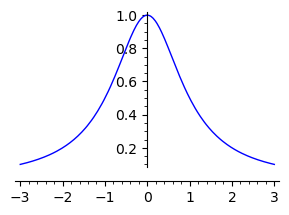

In [2]:
plot(f,-3,3,figsize=3)

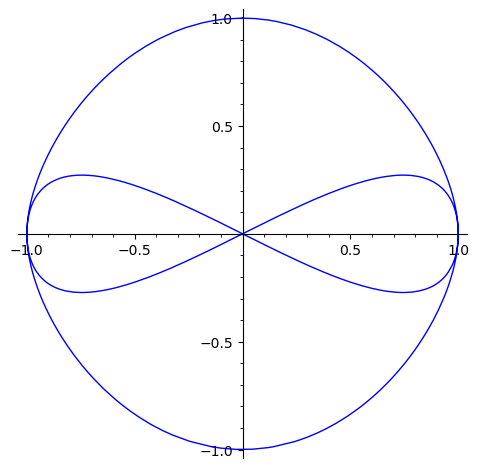

In [3]:
parametric_plot(c(t),(t,0,2*pi))

## Interpolación polinomial

Para aplicar la interpolación polinomial a nuestra función, en primer lugar tenemos que elegir los nodos de interpolación. 

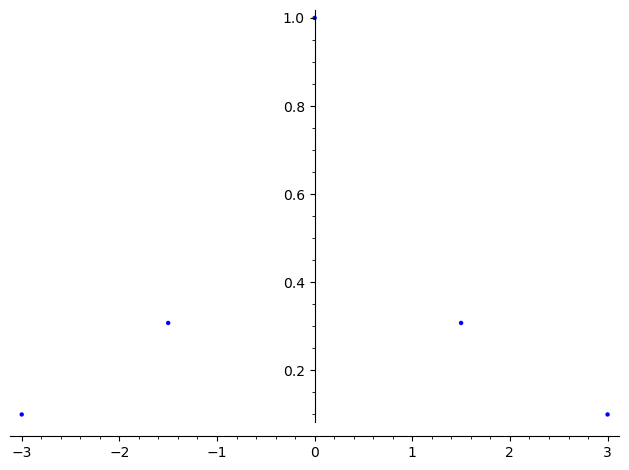

In [4]:
n = 4
h = 6/n
nodos_interpolacion = [-3, -3+h .. 3]
puntos_valores = [ (k,f(k)) for k in nodos_interpolacion]
point(puntos_valores)

Dada una base del espacio de los polinomios de grado $\leq n$, $p_0,\ldots,p_n$, sea $P$ el polinomio interpolador de $f$. Podemos escribir $P$ como combinación lineal de los polinomios de la base,
$$
P(x) = \sum_{i=0}^n a_i p_i(x).
$$
Entonces $a = (a_0,\ldots,a_n)$ es solución del sistema lineal
$A a = b$, donde $b=(f(x_0),\ldots,f(x_n))$ y
$$
A = \left(\begin{array}{ccc}
p_0(x_0) & \ldots & p_n(x_0) \\
\vdots & \ddots & \vdots \\
p_0(x_n) & \ldots & p_n(x_n) \\
\end{array}\right)
$$

In [5]:
# Matriz de interpolación
base = [1+0*x] + [x^k for k in [1..n]]
A = matrix([[ pi(x=xi) for pi in base] for xi in nodos_interpolacion ])
show(A)

[    1    -3     9   -27    81]
[    1  -3/2   9/4 -27/8 81/16]
[    1     0     0     0     0]
[    1   3/2   9/4  27/8 81/16]
[    1     3     9    27    81]

<div class="alert alert-block alert-info">
<strong>Ejercicio 1. </strong> 

1. Calcular el polinomio interpolador resolviendo el sistema.

2. Calcular las matrices con la base de Lagrange y con la de Newton.

3. Calcular el polinomio interpolador con el método de Lagrange o de Newton.

4. Calcula y representa el polinomio interpolador para $n=5,10,15$.

5. Acotar el error cometido con $n=5,10,15$. Para acotar funciones se puede utilizar el método find_local_maximum (sería una acotación numérica, por tanto sólo una aproximación). Como ejercicio, tratar de acotar el error para $n=3$ sin utilizar dicho método.   

</div>

In [6]:
n = 4
h = 6/n
nodos = [-3, -3+h .. 3]
valores = [ f(k) for k in nodos_interpolacion]
nodos, valores

([-3, -3/2, 0, 3/2, 3], [1/10, 4/13, 1, 4/13, 1/10])

In [9]:
base = [1+0*x] + [x^k for k in [1..n]]
A = matrix([[ pi(x=xi) for pi in base] for xi in nodos_interpolacion ])

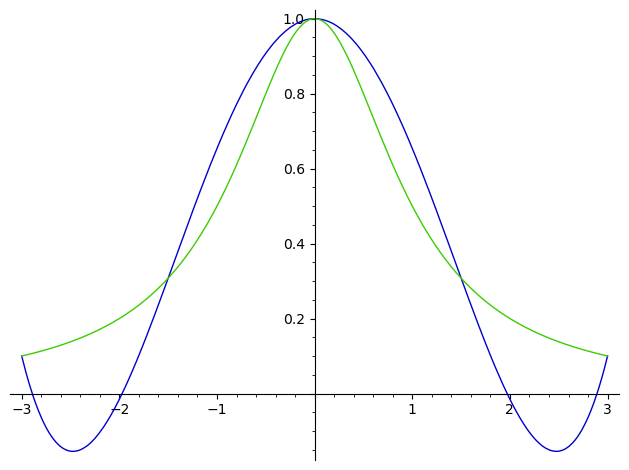

In [14]:
a = A\vector(valores)
p(x) = a*vector(base)
plot([p,f],-3,3)

### Lagrange

In [45]:
nodos

[-3, -3/2, 0, 3/2, 3]

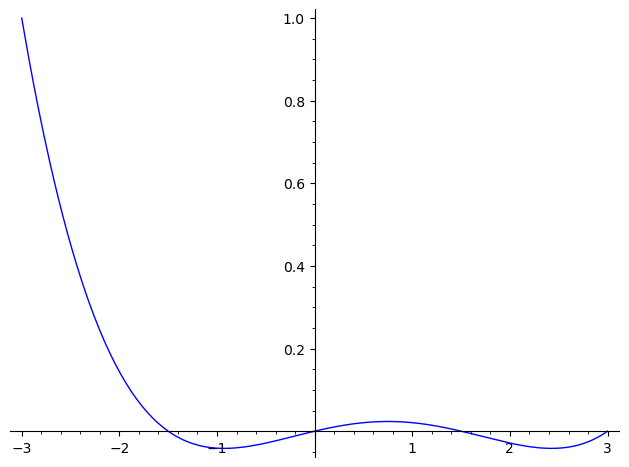

In [55]:
L0 = (x-nodos[1])        *  (x-nodos[2])        * (x-nodos[3])        * (x-nodos[4]) / \
    ( (nodos[0]-nodos[1]) * (nodos[0]-nodos[2]) * (nodos[0]-nodos[3]) * (nodos[0]-nodos[4]) )
plot(L0,-3,3)

In [56]:
def p_lag(nodos,j):
    n = len(nodos) -1
    pol = 1
    for i in [0 .. n]:
        if i!= j:
            pol *= (x-nodos[i])/(nodos[j]-nodos[i])
    return pol

In [59]:
[p_lag(nodos,k) for k in [0 .. 4]]

[1/486*(2*x + 3)*(2*x - 3)*(x - 3)*x,
 -4/243*(2*x - 3)*(x + 3)*(x - 3)*x,
 1/81*(2*x + 3)*(2*x - 3)*(x + 3)*(x - 3),
 -4/243*(2*x + 3)*(x + 3)*(x - 3)*x,
 1/486*(2*x + 3)*(2*x - 3)*(x + 3)*x]

In [61]:
pl(x) = sum([ f(nodos[k]) * p_lag(nodos,k) for k in [0 .. 4]])

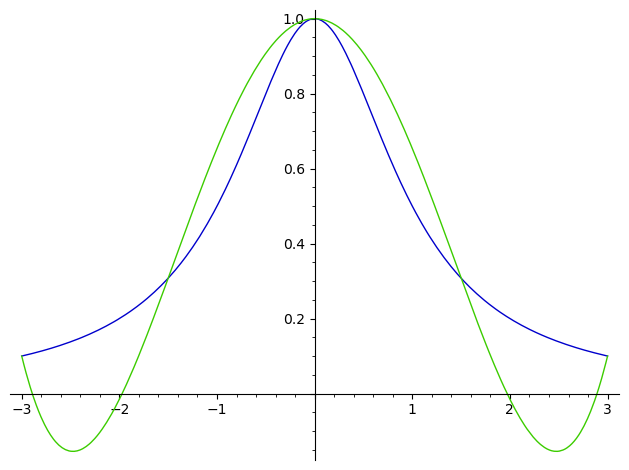

In [62]:
plot([f,pl],-3,3)

### Newton

In [18]:
base = [1+0*x] # comienzo con la función constante 1 (sumamos 0*x para que sea función)
n = len(nodos) - 1 # el grado del polinomio es el número de puntos menos 1
for i in [0 .. 3]: # El último elemento no está en la base de Newton
    # Voy añadiendo un factor de la forma x-xi en cada paso
    base += [ base[-1]*(x-nodos[i]) ]
base # Tenemos la base

[1,
 x + 3,
 1/2*(2*x + 3)*(x + 3),
 1/2*(2*x + 3)*(x + 3)*x,
 1/4*(2*x + 3)*(2*x - 3)*(x + 3)*x]

In [42]:
# Diferencias divididas de los puntos [x0, ..., xn]
def dd(puntos,f):
    if len(puntos)==1: # Si hay un único punto, la diferencia dividida es el valor de la función en dicho punto
        return f(puntos[0])
    return ( dd(puntos[1:],f) - dd(puntos[:-1],f) ) / (puntos[-1] - puntos[0]) # Fórmula recursiva de las diferencias divididas

In [43]:
# Calculamos los coeficientes en la base de Newton
a = [dd(nodos[:k],f) for k in [1..5]]

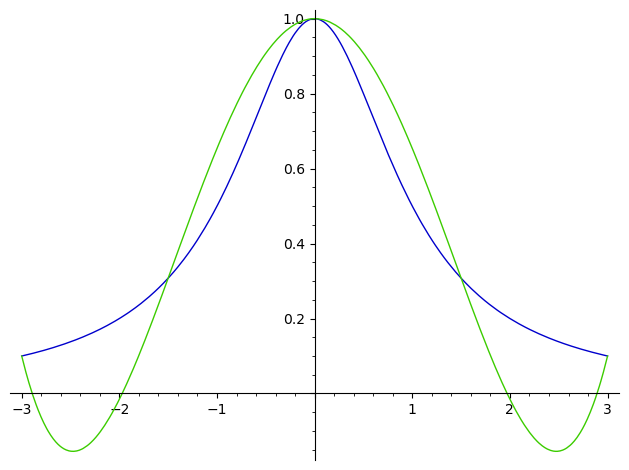

In [44]:
plot([f,vector(a) * vector(base)],-3,3)

<div class="alert alert-block alert-info">
<strong>Ejercicio 2. </strong> 

1. Calcular la interpolación polinomial de la curva $c(t)$, eligiendo 10,20 y 40 nodos equiespaciados.

2. Acotar el error cometido en la interpolación anterior. Elije la norma que prefieras.

</div>

In [50]:
c(t) = [2*sin(t)*cos(t),cos(t)*cos(2*t) ]
n = 9
nodos = [0., (2*pi.n())/n .. 2*pi.n() ]
valores = [ c(ti) for ti in nodos ]

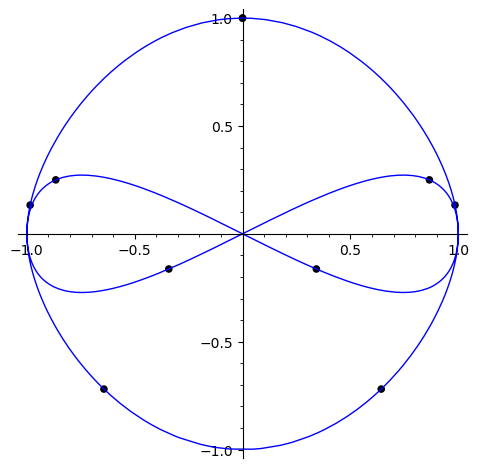

In [51]:
parametric_plot(c(t),(t,0,2*pi)) + points(valores,color='black',size=30)

In [52]:
var('t')
base = [1+0*t] # comienzo con la función constante 1 (sumamos 0*x para que sea función)
for i in [0 .. n-1]: # El último elemento no está en la base de Newton
    # Voy añadiendo un factor de la forma x-xi en cada paso
    base += [ base[-1]*(t-nodos[i]) ]
len(base) # Tenemos la base

10

In [53]:
@cached_function
# Diferencias divididas de los puntos [x0, ..., xn]
def dd(puntos,f):
    if len(puntos)==1: # Si hay un único punto, la diferencia dividida es el valor de la función en dicho punto
        return f(puntos[0])
    return ( dd(puntos[1:],f) - dd(puntos[:-1],f) ) / (puntos[-1] - puntos[0]) # Fórmula recursiva de las diferencias divididas

In [54]:
fx(t) = 2*sin(t)*cos(t) # c(t)[0]
ax = [dd(vector(nodos[:k]),fx) for k in [1 .. n+1]]
px(t) = vector(ax) * vector(base)

In [55]:
fy(t) = cos(t)*cos(2*t) # c(t)[1]
ay = [dd(vector(nodos[:k]),fy) for k in [1 .. n+1]]
py(t) = vector(ay) * vector(base)

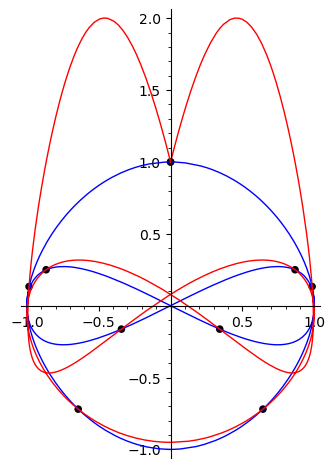

In [56]:
parametric_plot(c(t),(t,0,2*pi)) + points(valores,color='black',size=30) + \
parametric_plot([px(t),py(t)],(t,0,2*pi),color='red')

<div class="alert alert-block alert-info">
<strong>Ejercicio 3. </strong> 

Interpolación mediante funciones de base radial. En el método general se usan los polinomios pues es una función sencilla de manejar y con buenas propiedades, pero podríamos utilizar cualquier familia de funciones linealmente independientes como base. En particular, si $x_0,\ldots,x_n$ son los puntos donde queremos interpolar $f$, entonces podemos fijar $\epsilon>0$ y considerar como base las funciones
$$
\left\{\frac{1}{1+\epsilon (x-x_i)^2}\colon 0\leq i\leq n\right\}.
$$
Obtén la interpolación de $\cos\,t$ utilizando dichas funciones como base. Prueba con valores de $\epsilon$, $1/10$, $1$, $10$.

</div>

## Splines 

Aunque Sage tiene un comando spline, que devuelve el spline que interpola una lista de puntos de la gráfica de una función, dicho comando está pensado sobre todo para aplicarlo de modo numérico. Por ello, a continuación se incluye el cálculo de los splines cúbicos naturales mediante el método de los momentos, lo que nos permitirá aplicarlos de modo más flexible.

En primer lugar, crearemos una función que calcule las constantes que aparecen en el método de los momentos.

In [ ]:
def constantes_momentos(puntos):
    xi,yi=zip(*puntos)
    hi=[a-b for a,b in zip(xi[1:],xi[:-1])]
    hyi=[a-b for a,b in zip(yi[1:],yi[:-1])]
    bi=[a/b for a,b in zip(hyi,hi)]
    ui=[2*(a+b) for a,b in zip(hi[1:],hi[:-1])]
    vi=[6*(a-b) for a,b in zip(bi[1:],bi[:-1])]
    return hi,ui,vi

Ahora podemos plantear la matriz del sistema. Nótese con $n=3$ únicamente necesitamos calcular 2 momentos.

In [ ]:
# Calculamos las constantes del sistema
f(x) = 1/(1+x^2)
n = 3
h = 6/n
nodos_cuadratura = [-3, -3+h .. 3]
puntos = [ (k,f(k)) for k in nodos_cuadratura]
hi,ui,vi = constantes_momentos(puntos)

In [ ]:
# Definimos la matriz
A = matrix.diagonal(ui)
for i in range(n-2):
    A[i+1,i] = hi[i]
    A[i,i+1] = hi[i+1]
show(A)

In [ ]:
# Resolvemos el sistema
A\vector(vi)

<div class="alert alert-block alert-info">
<strong>Ejercicio 1. </strong> 

1. Calcula y dibuja el spline que interpola la función $f(x) = 1/(1+x^2)$ en cuatro puntos equiespaciados puntos, siendo dos de ellos los extremos. 

2. Obtener el spline cúbico de Hermite en los cuatro puntos anteriores.
    
3. Calcula el máximo y el mínimo de la función. Compáralo con el resultado de calcularlo usando:
    a) el polinomio interpolador en los cuatro puntos anteriores.
    b) el spline lineal en los cuatro puntos anteriores.
    c) el spline cúbico lineal en los cuatro puntos anteriores.
    d) el spline cúbico de Hermite en los cuatro puntos anteriores.

4. Obtén el spline cúbico natural con 10 puntos. Para hacerlo más sencillo, puedes programar una función que reciba las constantes $x,y,z$ y el valor de $i$ y devuelva el $i$-ésimo polinomio del spline.
    
</div>

<div class="alert alert-block alert-info">
<strong>Ejercicio 2. </strong> 
 
1. Calcula el spline interpolador para la curva $c$ en 10 puntos. Dibuja el spline y la curva. 
    
2. Piensa cómo habría que modificar el método para que el spline obtenido sea el periódico en lugar del natural y obtén dicho spline.
    
</div>